**Oasis InfoByte**

**Data Science Internship Tasks**

**Task 2) Unemployment Analysis Model on Indian DataSet during Covid-Time**

**The model is designed for India's unemployment data during COVID, which involved handling two datasets with different shapes and feature counts, complicating data integration and preprocessing. Optimizing a RandomForestRegressor with many features demanded significant computational resources and careful fine-tuning. Evaluating the model with detailed visualizations and feature importance analysis added to the overall complexity.**

**Importing all Necessary Libraires**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller

**Loading DataSet**

In [91]:
data1 = pd.read_csv('Unemployment in India.csv')
data2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

**Discovering DataSet**

In [92]:
data1.shape

(768, 7)

In [93]:
data2.shape

(267, 9)

In [94]:
data1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [95]:
data2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [96]:
data1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [97]:
data2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

**Standardizing Column Names, Handling Missing values & Filling them**

In [98]:
data1.columns = data1.columns.str.strip().str.lower()
data2.columns = data2.columns.str.strip().str.lower()

unemployment_column = 'estimated unemployment rate (%)'

numeric_cols_data1 = data1.select_dtypes(include=[np.number]).columns
categorical_cols_data1 = data1.select_dtypes(exclude=[np.number]).columns

data1[numeric_cols_data1] = data1[numeric_cols_data1].fillna(data1[numeric_cols_data1].median())

for col in categorical_cols_data1:
    data1[col].fillna(data1[col].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8200\1011366780.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1[col].fillna(data1[col].mode()[0], inplace=True)


**Converting Categorical Variables using One-Hot Encoding & Dropping Target Variable**

In [99]:
data1 = pd.get_dummies(data1, drop_first=True)

y = data1[unemployment_column]

X = data1.drop(columns=[unemployment_column])

**Splitting DataSet into Train-Test**

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature scaling**

In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Applying Random Forest Regressor Model & Fitting Model**

In [102]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

rf_reg.fit(X_train_scaled, y_train)

y_pred = rf_reg.predict(X_test_scaled)

**Evaluation of Model**

In [103]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 17.805328402532464
R-squared: 0.7034956640841658


**Plotting Actual vs Predicted Values**

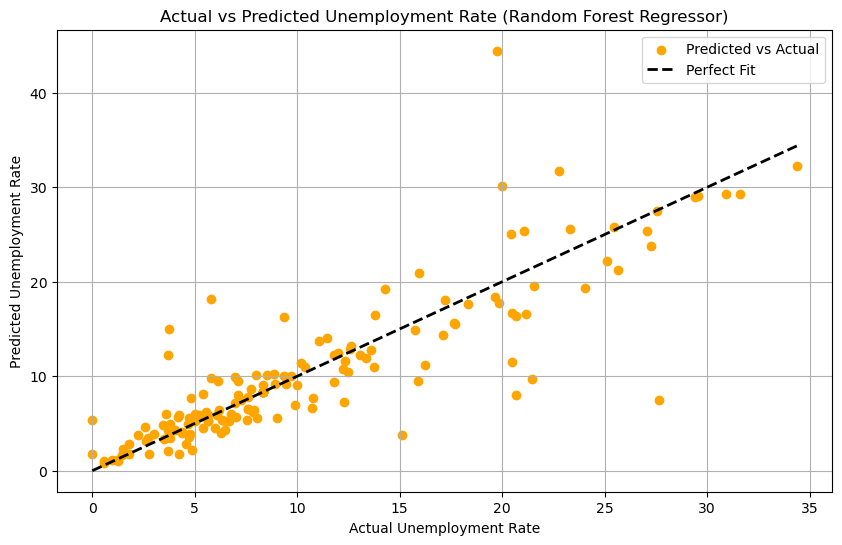

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='orange', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Unemployment Rate')
plt.ylabel('Predicted Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate (Random Forest Regressor)')
plt.grid(True)
plt.legend()
plt.show()

**Visualizing Feature Importance**

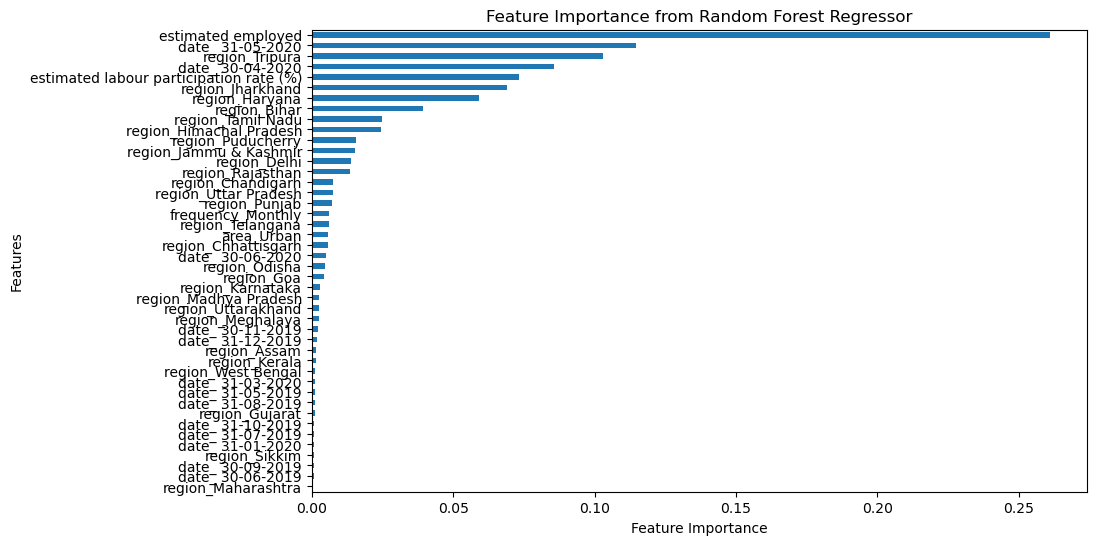

In [105]:
importance = pd.Series(rf_reg.feature_importances_, index=X.columns)
importance.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance from Random Forest Regressor')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

**Checking for Stationarity of Target Variable**

In [106]:
def check_stationarity(timeseries):
    adf_test = adfuller(timeseries.dropna())
    print(f'ADF Statistic: {adf_test[0]}')
    print(f'p-value: {adf_test[1]}')
    if (adf_test[1] > 0.05):
        print("Series is not stationary. Differencing may be needed.")
    else:
        print("Series is stationary.")

check_stationarity(data1[unemployment_column])

ADF Statistic: -5.167712097758977
p-value: 1.0229418463746945e-05
Series is stationary.


**Correlation Matrix**

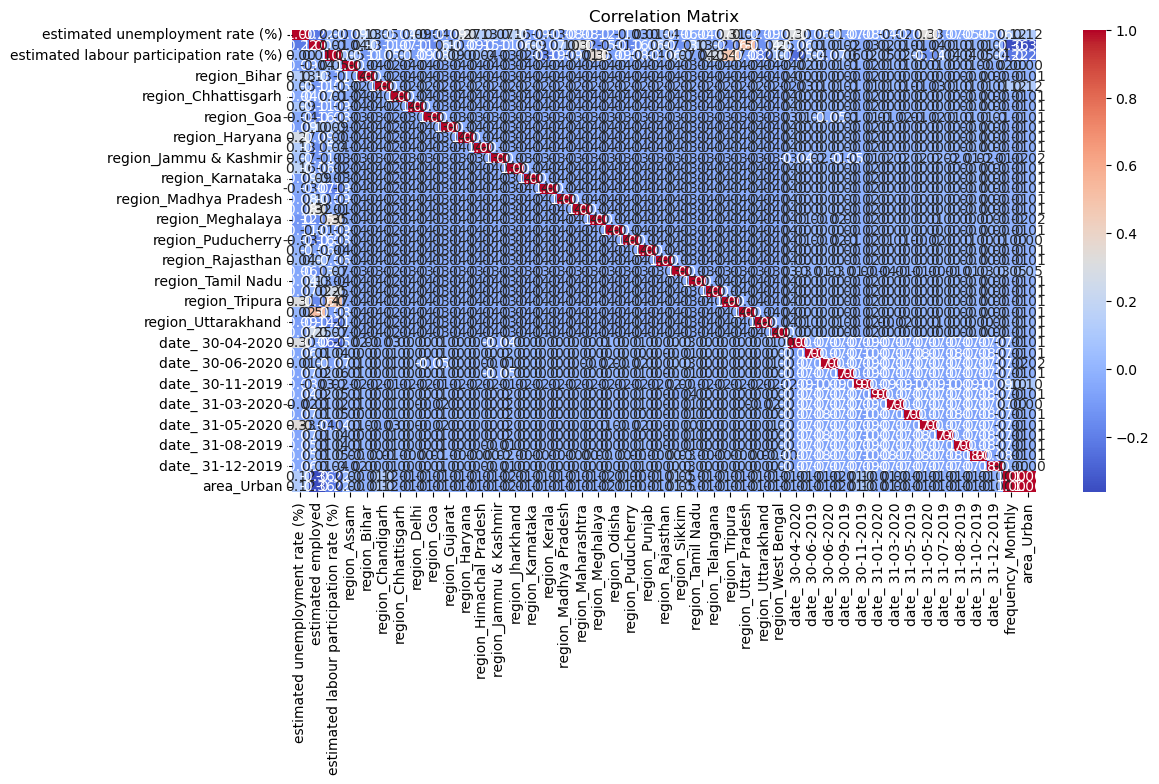

In [107]:
plt.figure(figsize=(12, 6))
sns.heatmap(data1.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Distribution of Target Variable**

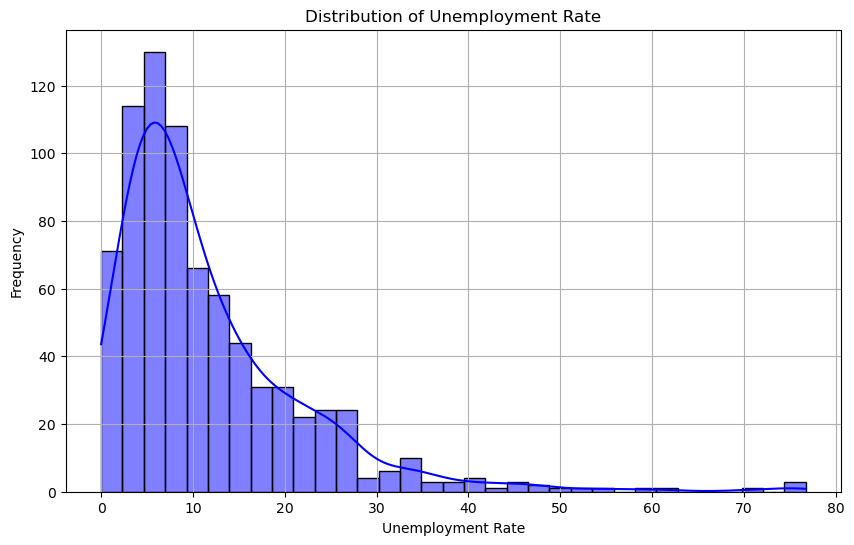

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(data1[unemployment_column], kde=True, color='blue')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Boxplot of Unemployment Rate by Categorical Features**

In [109]:
for col in categorical_cols_data1:
    if col in data1.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=col, y=unemployment_column, data=data1)
        plt.title(f'Boxplot of {unemployment_column} by {col}')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

**Pair Plot for exploring Relationships B/W Numerical-Features**

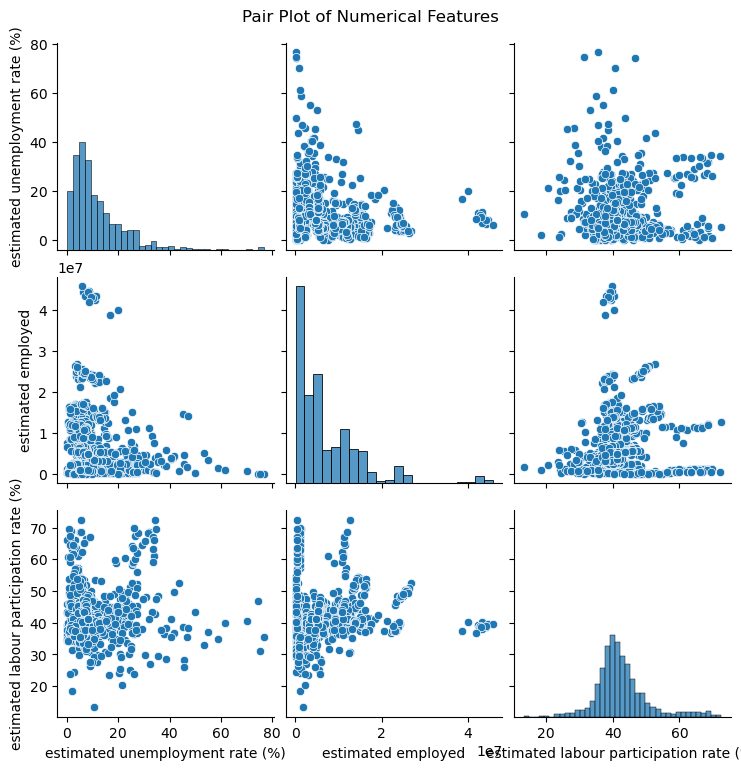

In [110]:
sns.pairplot(data1[numeric_cols_data1])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

**Count Plot for Categorical Features**

In [115]:
for col in categorical_cols_data1:
    if col in data1.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=col, data=data1)
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

**Violin Plot ( If Optional, Here NO )**

In [112]:
for col in categorical_cols_data1:
    if col in data1.columns:
        plt.figure(figsize=(12, 6))
        sns.violinplot(x=col, y=unemployment_column, data=data1)
        plt.title(f'Violin Plot of {unemployment_column} by {col}')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

**Plotting Residuals**

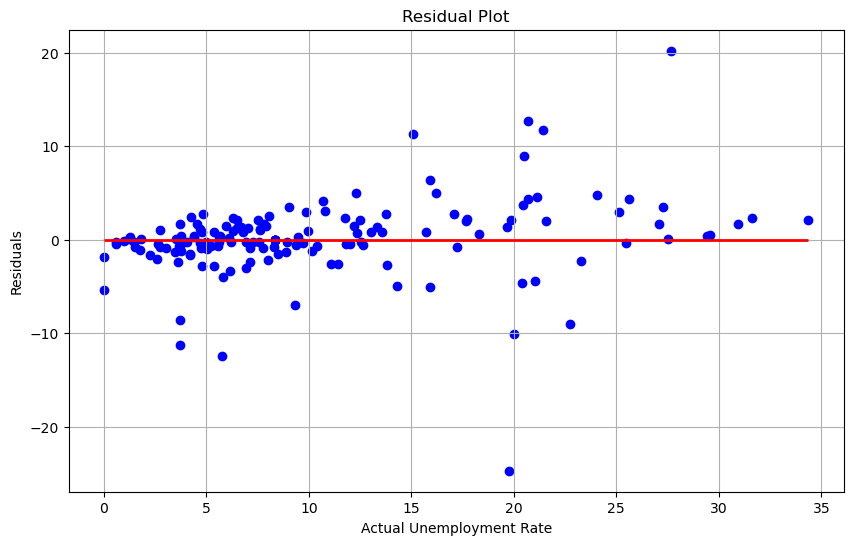

In [113]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred, color='blue')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', lw=2)
plt.xlabel('Actual Unemployment Rate')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

**Learning Curve**

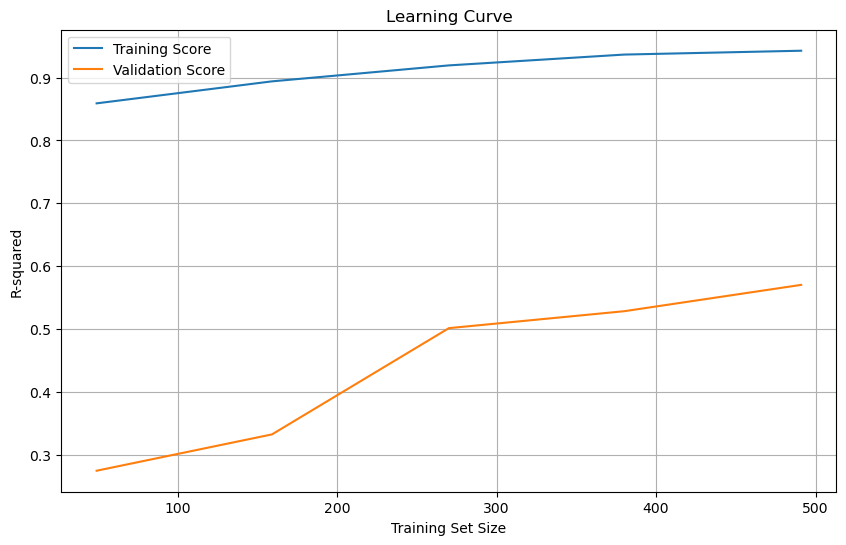

In [114]:
train_sizes, train_scores, test_scores = learning_curve(rf_reg, X_train_scaled, y_train, cv=5, scoring='r2')

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()